In [1]:
import pandas as pd 
import numpy as np
from geopy.distance import geodesic as GD

In [2]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'],utc=True)

In [4]:
df['Pickup_Date'] = df['pickup_datetime'].dt.date
df['Pickup_Time'] = df['pickup_datetime'].dt.time
df = df.drop('pickup_datetime',axis=1)
df= df[['key','Pickup_Date','Pickup_Time','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','fare_amount']]
df.head()

,key,Pickup_Date,Pickup_Time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2015-05-07 19:52:06.0000003,2015-05-07,19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,7.5
1,2009-07-17 20:04:56.0000002,2009-07-17,20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,7.7
2,2009-08-24 21:45:00.00000061,2009-08-24,21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,12.9
3,2009-06-26 08:22:21.0000001,2009-06-26,08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,5.3
4,2014-08-28 17:47:00.000000188,2014-08-28,17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,16.0


In [5]:
df.dtypes

key                   object
Pickup_Date           object
Pickup_Time           object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
fare_amount          float64
dtype: object

In [6]:
# drop null values
df = df.dropna()
df = df.reset_index(drop=True)

# check again for null values
df.isna().sum()

key                  0
Pickup_Date          0
Pickup_Time          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
fare_amount          0
dtype: int64

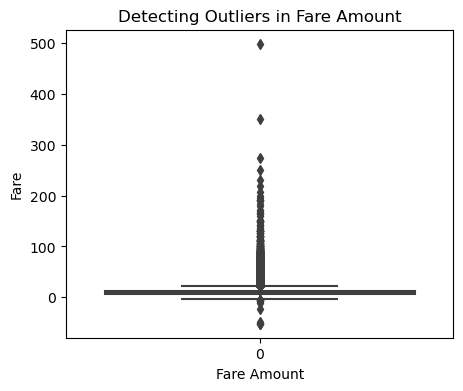

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.boxplot(data= df['fare_amount'])
plt.xlabel('Fare Amount')
plt.ylabel('Fare')
plt.title('Detecting Outliers in Fare Amount')
plt.show()

In [8]:
df['fare_amount'].describe()

count    199999.000000
mean         11.359892
std           9.901760
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

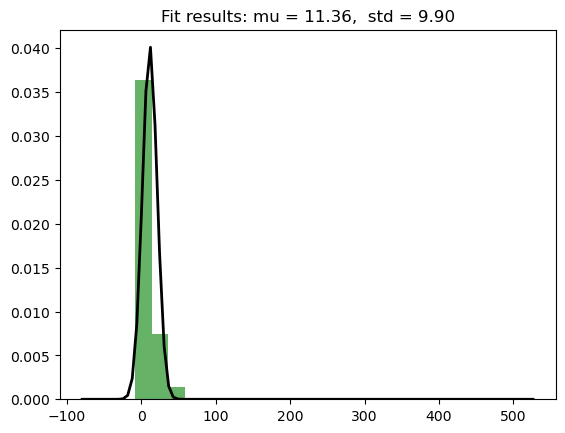

In [9]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.
data = df['fare_amount']

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [10]:
# function to remove outliers using the IQR method
def remove_outliers(df, columns):
    
    # looping through each column
    for col in columns:
        feature = df[col]
        q1 = feature.quantile(0.25)
        q3 = feature.quantile(0.75)
        IQR = q3 - q1
        lower_bound = float(q1 - 1.5 * IQR)  # Cast to float
        upper_bound = float(q3 + 1.5 * IQR)  # Cast to float

        # replacing outliers with bounds
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

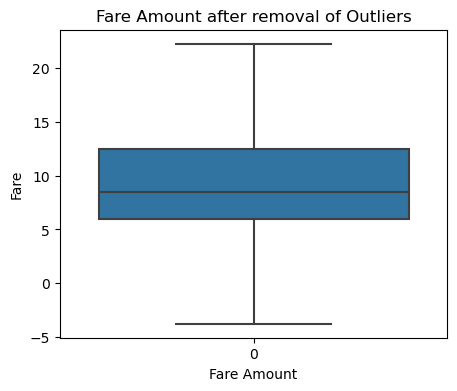

In [11]:
# remove outliers
df = remove_outliers(df, ['fare_amount'])

# plotting the boxplot for cleaned data
plt.figure(figsize=(5, 4))
sns.boxplot(data=df['fare_amount'])
plt.xlabel('Fare Amount')
plt.ylabel('Fare')
plt.title('Fare Amount after removal of Outliers')
plt.show()

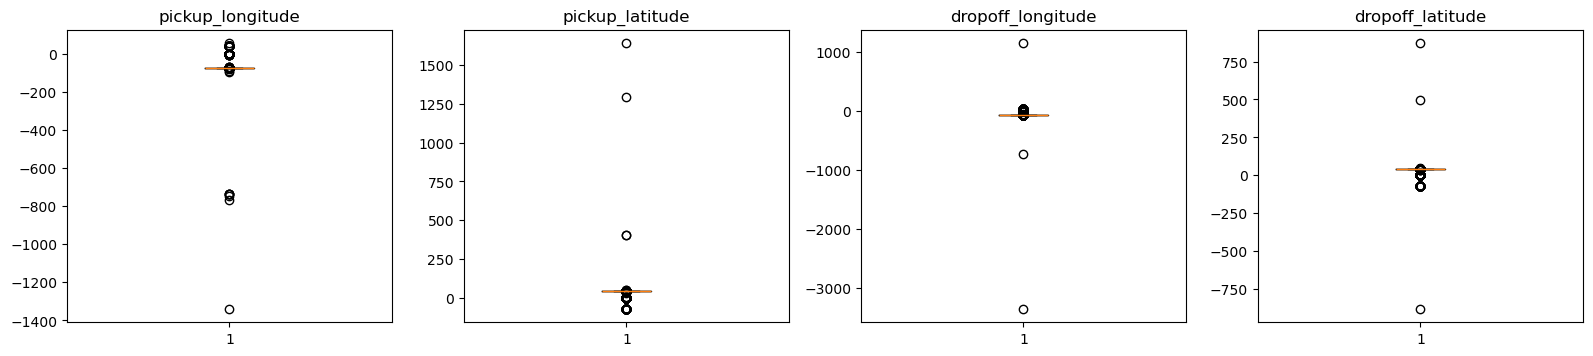

In [12]:
# outliers detection using boxplot
plt.figure(figsize =(20, 20))

for i , variable in enumerate(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']):
    plt.subplot(6 , 5, i +1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
    
plt.show()

In [13]:
# setting possible range for longitudes
longitude_up = 180
longitude_down = -180

# setting possible range for latitudes
latitude_up = 90
latitude_down = -90

# choosing only the ones that fall inside the possible range
df = df[(df['pickup_longitude']  >= longitude_down) & 
        (df['dropoff_longitude'] >= longitude_down) & 
        (df['pickup_longitude']  <= longitude_up)   &
        (df['dropoff_longitude'] <= longitude_up)   &
        (df['pickup_latitude']   >= latitude_down)  & 
        (df['dropoff_latitude']  >= latitude_down)  & 
        (df['pickup_latitude']   <= latitude_up)    &
        (df['dropoff_latitude']  <= latitude_up)]

df.head()

,key,Pickup_Date,Pickup_Time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2015-05-07 19:52:06.0000003,2015-05-07,19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,7.5
1,2009-07-17 20:04:56.0000002,2009-07-17,20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,7.7
2,2009-08-24 21:45:00.00000061,2009-08-24,21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,12.9
3,2009-06-26 08:22:21.0000001,2009-06-26,08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,5.3
4,2014-08-28 17:47:00.000000188,2014-08-28,17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,16.0


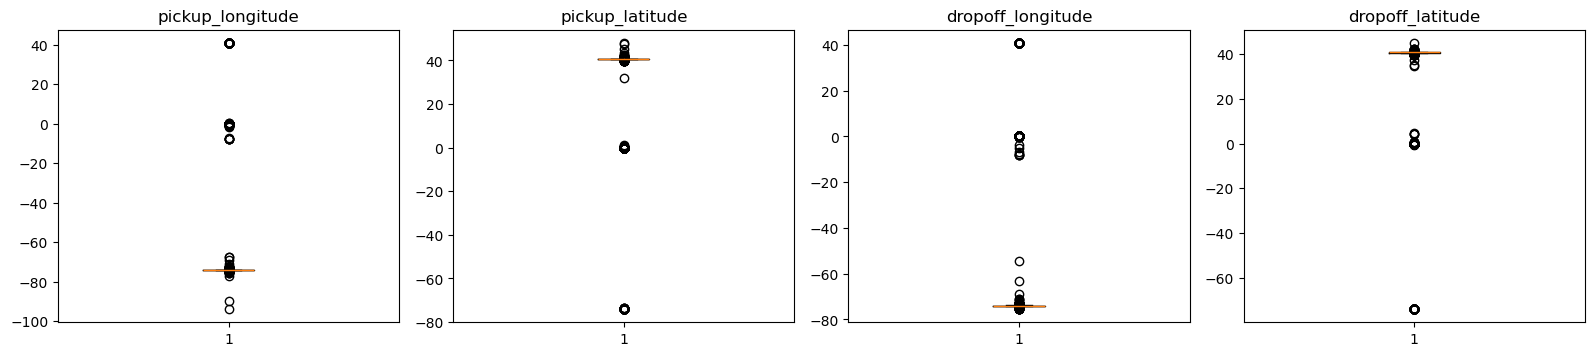

In [14]:
# outliers detection using boxplot
plt.figure(figsize =(20, 20))

for i , variable in enumerate(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']):
    plt.subplot(6 , 5, i +1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
    
plt.show()

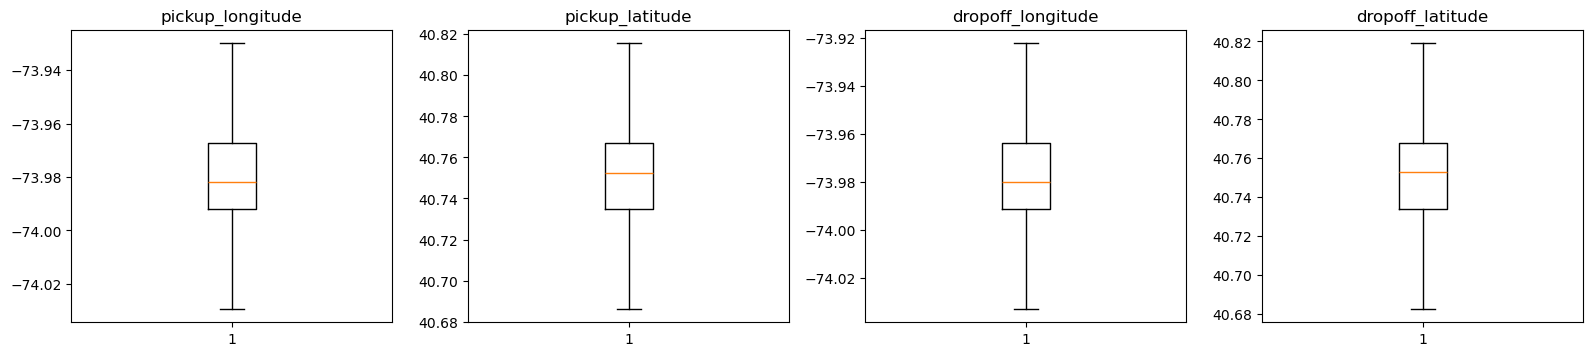

In [15]:
# remove outliers
df = remove_outliers(df, ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])

plt.figure(figsize =(20, 20))

for i , variable in enumerate(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']):
    plt.subplot(6 , 5, i +1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
    
# plot boxplot of cleaned coordinate data 
plt.show()

In [16]:
def calculate_distance(row):
  start = (row['pickup_latitude'], row['pickup_longitude'])
  end = (row['dropoff_latitude'], row['dropoff_longitude'])
  return GD(start, end).miles  # Or geodesic(start, end).km for kilometers

In [17]:
# Assuming 'df' is your DataFrame
df['Ride_Distance'] = df.apply(calculate_distance, axis=1)
df.head()

,key,Pickup_Date,Pickup_Time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,Ride_Distance
0,2015-05-07 19:52:06.0000003,2015-05-07,19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,7.5,1.044594
1,2009-07-17 20:04:56.0000002,2009-07-17,20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,7.7,1.525071
2,2009-08-24 21:45:00.00000061,2009-08-24,21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,12.9,3.131464
3,2009-06-26 08:22:21.0000001,2009-06-26,08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,5.3,1.032372
4,2014-08-28 17:47:00.000000188,2014-08-28,17:47:00,-73.929789,40.744085,-73.973082,40.761247,5,16.0,2.561892


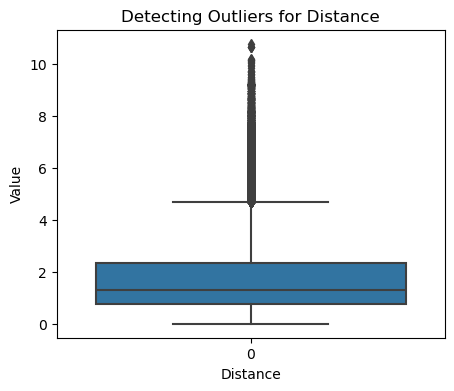

In [18]:
# checking outliers for distance
plt.figure(figsize=(5, 4))
sns.boxplot(data=df['Ride_Distance'])
plt.xlabel('Distance')
plt.ylabel('Value')
plt.title('Detecting Outliers for Distance')
plt.show()

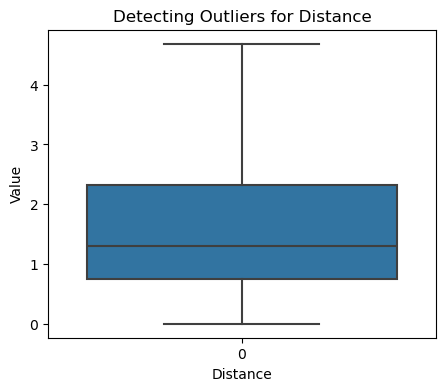

In [19]:
# remove outliers
df = remove_outliers(df, ['Ride_Distance'])

plt.figure(figsize=(5, 4))
sns.boxplot(data=df['Ride_Distance'])
plt.xlabel('Distance')
plt.ylabel('Value')
plt.title('Detecting Outliers for Distance')
plt.show()

In [20]:
df= df[['Pickup_Date', 'Pickup_Time', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'Ride_Distance','fare_amount']]
df.head()

,Pickup_Date,Pickup_Time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Ride_Distance,fare_amount
0,2015-05-07,19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,1.044594,7.5
1,2009-07-17,20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,1.525071,7.7
2,2009-08-24,21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,3.131464,12.9
3,2009-06-26,08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,1.032372,5.3
4,2014-08-28,17:47:00,-73.929789,40.744085,-73.973082,40.761247,5,2.561892,16.0


In [21]:
df.dtypes

Pickup_Date           object
Pickup_Time           object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
Ride_Distance        float64
fare_amount          float64
dtype: object

In [22]:
#Process Pickup_Time
def classify_time_of_day(time_str):

  hour = int(str(time_str).split(':')[0])
  if 5 <= hour < 12:
    return 'Morning'
  elif 12 <= hour < 17:
    return 'Afternoon'
  elif 17 <= hour < 20:
    return 'Evening'
  elif hour >= 20 or hour < 5:
    return 'Late Night'
  else:
    return 'Early Morning'
df['Time_of_Day'] = df['Pickup_Time'].apply(classify_time_of_day)
df.head()

,Pickup_Date,Pickup_Time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Ride_Distance,fare_amount,Time_of_Day
0,2015-05-07,19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,1.044594,7.5,Evening
1,2009-07-17,20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,1.525071,7.7,Late Night
2,2009-08-24,21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,3.131464,12.9,Late Night
3,2009-06-26,08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,1.032372,5.3,Morning
4,2014-08-28,17:47:00,-73.929789,40.744085,-73.973082,40.761247,5,2.561892,16.0,Evening


In [23]:
def classify_day(date_str):
  date_obj = pd.to_datetime(date_str)
  day_of_week = date_obj.weekday()
  return 'Weekend' if day_of_week in [5, 6] else 'Weekday'
df['Day_Type'] = df['Pickup_Date'].apply(classify_day)
df.head()

,Pickup_Date,Pickup_Time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Ride_Distance,fare_amount,Time_of_Day,Day_Type
0,2015-05-07,19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,1.044594,7.5,Evening,Weekday
1,2009-07-17,20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,1.525071,7.7,Late Night,Weekday
2,2009-08-24,21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,3.131464,12.9,Late Night,Weekday
3,2009-06-26,08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,1.032372,5.3,Morning,Weekday
4,2014-08-28,17:47:00,-73.929789,40.744085,-73.973082,40.761247,5,2.561892,16.0,Evening,Weekday


In [24]:
df = df.drop(columns=['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','Pickup_Time','Pickup_Date'])
df.head()

,passenger_count,Ride_Distance,fare_amount,Time_of_Day,Day_Type
0,1,1.044594,7.5,Evening,Weekday
1,1,1.525071,7.7,Late Night,Weekday
2,1,3.131464,12.9,Late Night,Weekday
3,3,1.032372,5.3,Morning,Weekday
4,5,2.561892,16.0,Evening,Weekday


In [25]:
df=df[['Time_of_Day', 'Day_Type','passenger_count', 'Ride_Distance',
       'fare_amount']]
df.head()

,Time_of_Day,Day_Type,passenger_count,Ride_Distance,fare_amount
0,Evening,Weekday,1,1.044594,7.5
1,Late Night,Weekday,1,1.525071,7.7
2,Late Night,Weekday,1,3.131464,12.9
3,Morning,Weekday,3,1.032372,5.3
4,Evening,Weekday,5,2.561892,16.0


In [26]:
cat_columns = ['Time_of_Day','Day_Type']
num_col = ['Ride_Distance']
from sklearn.preprocessing import LabelEncoder

encoders = {}  # Dictionary to save the encoders

for col in cat_columns:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders[col] = encoder

from sklearn.preprocessing import StandardScaler

scalers = {}  # Dictionary to save the scalers

for column in num_col:
    scaler = StandardScaler()
    df[column] = scaler.fit_transform(df[[column]])
    scalers[column] = scaler

df.head()

,Time_of_Day,Day_Type,passenger_count,Ride_Distance,fare_amount
0,1,0,1,-0.520452,7.5
1,2,0,1,-0.128451,7.7
2,2,0,1,1.182136,12.9
3,3,0,3,-0.530423,5.3
4,1,0,5,0.717446,16.0


In [27]:
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Train the XGBoost Regressor model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost Regressor Results:')
print(f'Mean Absolute Error: {mae_xgb}')
print(f'Mean Squared Error: {mse_xgb}')
print(f'Root Mean Squared Error: {rmse_xgb}')
print(f'R-squared: {r2_xgb}')

XGBoost Regressor Results:
Mean Absolute Error: 2.1173472618163776
Mean Squared Error: 9.745801584002447
Root Mean Squared Error: 3.1218266422084437
R-squared: 0.6689963485919788


In [31]:
import catboost as cb

# Train the CatBoost Regressor model
catboost_model = cb.CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=5,
    eval_metric='RMSE',
    cat_features=[0, 1],  # specify the indices of categorical features
    verbose=100
)

catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100)

# Predict on the test set
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate the model
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
rmse_catboost = np.sqrt(mse_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

print(f'CatBoost Regressor Results:')
print(f'Mean Absolute Error: {mae_catboost}')
print(f'Mean Squared Error: {mse_catboost}')
print(f'Root Mean Squared Error: {rmse_catboost}')
print(f'R-squared: {r2_catboost}')

0:	learn: 5.1116155	test: 5.0964481	best: 5.0964481 (0)	total: 139ms	remaining: 2m 19s
100:	learn: 3.0925286	test: 3.1053384	best: 3.1053384 (100)	total: 5.38s	remaining: 47.9s
200:	learn: 3.0867227	test: 3.1015852	best: 3.1015852 (200)	total: 9.93s	remaining: 39.5s
300:	learn: 3.0839166	test: 3.1010262	best: 3.1010262 (300)	total: 14.7s	remaining: 34.2s
400:	learn: 3.0817168	test: 3.1009875	best: 3.1009374 (322)	total: 19.7s	remaining: 29.4s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 3.100937417
bestIteration = 322

Shrink model to first 323 iterations.
CatBoost Regressor Results:
Mean Absolute Error: 2.103149310014874
Mean Squared Error: 9.615812878219794
Root Mean Squared Error: 3.1009374192685337
R-squared: 0.6734112482680084


In [34]:
# predicting total fare
y_pred = xgb_model.predict(X_test)

max_fare = y_pred + 2.1
min_fare = y_pred - 2.1

# creating a dataframe with Actual Fare, Total Fare (↓), and Total Fare (↑)
df_combined = pd.DataFrame({
    'Actual Fare': y_test,
    'Predicted Fare': y_pred,
    'Max Fare': max_fare,
    'Min Fare': min_fare,
})

# rounding to 2 decimal places
df_combined['Predicted Fare'] = ((100 * df_combined['Predicted Fare'].round(2)).astype(int)) / 100
df_combined['Max Fare'] = ((100 * df_combined['Max Fare'].round(2)).astype(int)) / 100
df_combined['Min Fare'] = ((100 * df_combined['Min Fare'].round(2)).astype(int)) / 100

# displaying the first 10 rows
df_combined.head(10)

,Actual Fare,Predicted Fare,Max Fare,Min Fare
129088,5.50,5.66,7.76,3.56
71243,10.50,13.62,15.72,11.52
182268,4.10,4.62,6.72,2.52
49528,21.30,15.87,17.96,13.77
67778,6.90,8.62,10.72,6.52
176450,22.25,20.94,23.04,18.84
112112,15.50,12.71,14.81,10.61
76202,4.50,5.94,8.04,3.84
129784,15.30,19.39,21.49,17.29
82529,22.25,18.75,20.85,16.65
